In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
import os
import sys

In [ ]:
if torch.cuda.is_available():
    print("GPU is available and being used.")
else:
    print("GPU is not available or not being used.")

GPU is available and being used.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/MyDrive/Colab_Notebooks/DeepFRC-main/DeepFRC/fun_helpers
# print(os.getcwd())

# 假设当前代码在 data/ 文件夹中
# 返回上一级，然后加上 fun_helpers 路径
sys.path.append(os.path.abspath(os.path.join("..", "fun_helpers")))

# 现在可以导入 interp1d.py 中的 Interp1d 类了
from torchinterp1d import Interp1d

/content/gdrive/MyDrive/Colab_Notebooks/DeepFRC-main/DeepFRC/fun_helpers


In [ ]:
import sys
sys.path.append('../../function')
# Pytorch interpolation 1D
from torchinterp1d import Interp1d

folder = 'row_data/'
Path(folder).mkdir(parents=True, exist_ok=True)

In [ ]:
!ls

allTrueSignals_0.csv  data_more_drastic.csv   torchinterp1d
allTrueSignals_1.csv  functions_helper_rn.py
allTrueSignals.csv    row_data


In [ ]:
num_curves = 3000 # num of curves for each class
seq_len = 1000 # datapoints

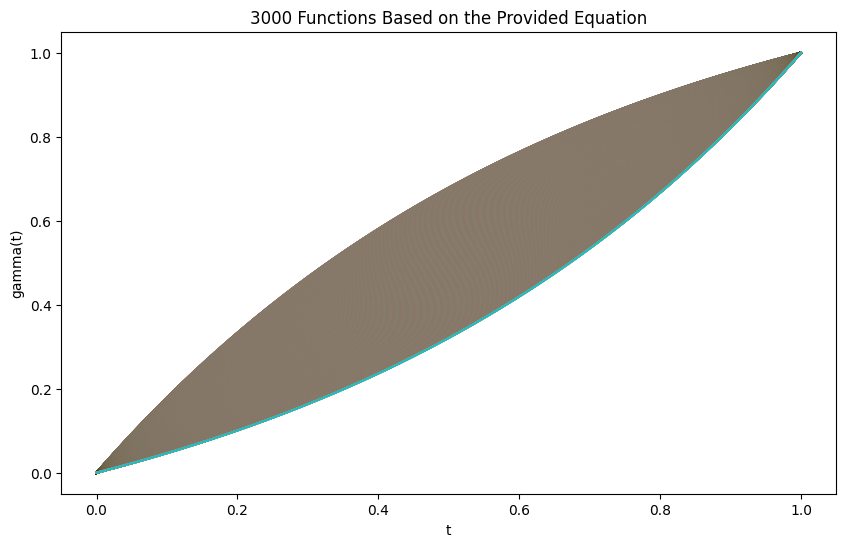

In [ ]:
# no sub-class
# generate gammas
n_length = seq_len
a_values = np.linspace(-1.5, 1.5, num_curves)

# Generate the x-axis (t)
t = np.linspace(0, 1, n_length)

# Generate the 10 functions
functions_each_type_A = []
for a_i in a_values:
    y_i = (np.exp(a_i * t) - 1) / (np.exp(a_i) - 1) if a_i != 0 else t
    functions_each_type_A.append(y_i)

# Plot the functions
fig, ax = plt.subplots(figsize=(10, 6))
for i, y_i in enumerate(functions_each_type_A):
    ax.plot(t, y_i, label=f"a={a_values[i]:.2f}")
ax.set_xlabel("t")
ax.set_ylabel("gamma(t)")
ax.set_title(f"{num_curves} Functions Based on the Provided Equation")
plt.show()

In [ ]:
gammas_A = np.array(functions_each_type_A)
gammas_A.shape

(3000, 1000)

class A

In [ ]:
# Create a figure for plotting
plt.figure(figsize=(8, 6))
# Create an array of x values
x = np.linspace(0, seq_len, seq_len)
# 2 peaks scenario
# base functions b1 & b2 (where each is a single peak function)
p_r_b1 = 60
p_r_b2 = 75
# for b1
# Randomly choose a location for the peak of the Gaussian curve
peak_location_b1 = 250
# Randomly choose the width of the peak, which affects how "fat" or "thin" the peak is
peak_range_b1 = p_r_b1
# Randomly choose the height of the peak
peak_height_b1 = 13

# for b2
peak_location_b2 = 715
peak_range_b2 = p_r_b2
peak_height_b2 = 12.5
"""
# for b3
peak_location_b3 = 800
peak_range_b3 = 10
peak_height_b3 = 1.12
"""
# type 1
y_type1_b1 = peak_height_b1 * np.exp(-0.5 * ((x - peak_location_b1) ** 2) / peak_range_b1 ** 2)
y_type1_b2 = peak_height_b2 * np.exp(-0.5 * ((x - peak_location_b2) ** 2) / peak_range_b2 ** 2)
# y_type1_b3 = peak_height_b3 * np.exp(-0.5 * ((x - peak_location_b3) ** 2) / peak_range_b3 ** 2)
y_type1 = y_type1_b1 + y_type1_b2

<Figure size 800x600 with 0 Axes>

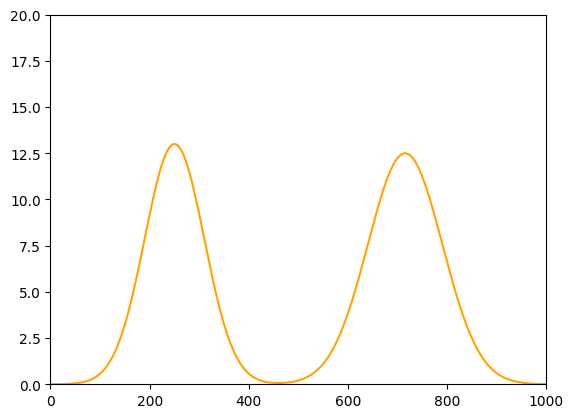

In [ ]:
plt.plot(x, y_type1, color='orange')
plt.xlim(0, seq_len)
plt.ylim(-0, 20)
plt.show()

In [ ]:
import random

data_A = np.zeros((num_curves, seq_len))
data_A[0, :] = y_type1
# for the rest "num_curves-1"
# we add small noises on range and height to simulate small difference between individuals
for i in range(1, num_curves):
    peak_location_b1i = peak_location_b1 # fixed
    peak_range_b1i = peak_range_b1 + random.randint(-2, 2)
    peak_height_b1i = peak_height_b1 + random.uniform(-0.5, 0.5)

    peak_location_b2i = peak_location_b2 # fixed
    peak_range_b2i = peak_range_b2 + random.randint(-3, 3)
    peak_height_b2i = peak_height_b2 + random.uniform(-1, 1)

    y_b1i = peak_height_b1i * np.exp(-0.5 * ((x - peak_location_b1i) ** 2) / peak_range_b1i ** 2)
    y_b2i = peak_height_b2i * np.exp(-0.5 * ((x - peak_location_b2i) ** 2) / peak_range_b2i ** 2)

    y_i = y_b1i + y_b2i

    data_A[i, :] = y_i


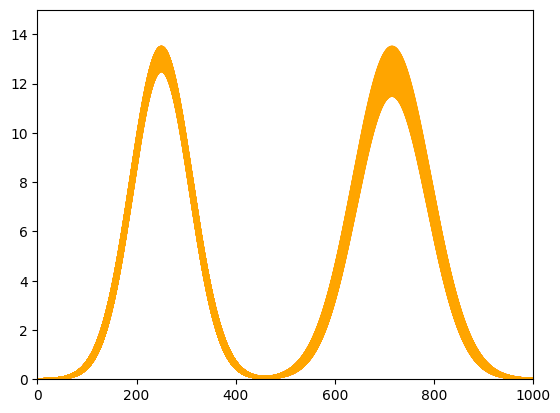

In [ ]:
for i in range(num_curves):
    plt.plot(x, data_A[i, :], 'orange', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(0, 15)
plt.show()

In [ ]:
 #################  Apply f@r  #######################
length_adjust = seq_len - 1
xid_train = torch.arange(seq_len).repeat(num_curves, 1)
# f @ r
input_f = torch.as_tensor(data_A) # (num_curves, seq_length)
r = torch.as_tensor(gammas_A)
f_r_A = Interp1d()(xid_train, input_f.squeeze(1), r * (length_adjust))
f_r_A = f_r_A.numpy()
f_r_A.shape

<ipython-input-23-69ce435a3bcb>:7: DeprecationWarning: <class 'torchinterp1d.interp1d.Interp1d'> should not be instantiated. Methods on autograd functions are all static, so you should invoke them on the class itself. Instantiating an autograd function will raise an error in a future version of PyTorch.
  f_r_A = Interp1d()(xid_train, input_f.squeeze(1), r * (length_adjust))


(3000, 1000)

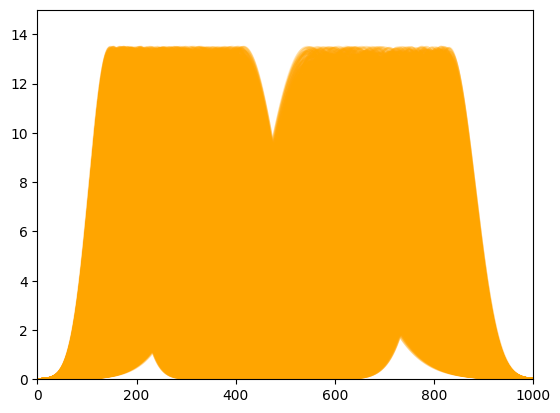

In [ ]:
for i in range(num_curves):
    plt.plot(x, f_r_A[i, :], 'orange', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(0, 15)
plt.show()

class B

In [ ]:
data_B = np.zeros((num_curves, seq_len))

In [ ]:
# Create a figure for plotting
plt.figure(figsize=(8, 6))
# Create an array of x values
x = np.linspace(0, seq_len, seq_len)
# 2 peaks scenario
# base functions b1 & b2 (where each is a single peak function)
p_r_b1 = 60
p_r_b2 = 100
# for b1
# Randomly choose a location for the peak of the Gaussian curve
peak_location_b1 = 225
# Randomly choose the width of the peak, which affects how "fat" or "thin" the peak is
peak_range_b1 = p_r_b1
# Randomly choose the height of the peak
peak_height_b1 = 12

# for b2
peak_location_b2 = 695
peak_range_b2 = p_r_b2
peak_height_b2 = 13
"""
# for b3
peak_location_b3 = 800
peak_range_b3 = 10
peak_height_b3 = 1.12
"""
# type 1
y_type1_b1 = peak_height_b1 * np.exp(-0.5 * ((x - peak_location_b1) ** 2) / peak_range_b1 ** 2)
y_type1_b2 = peak_height_b2 * np.exp(-0.5 * ((x - peak_location_b2) ** 2) / peak_range_b2 ** 2)
# y_type1_b3 = peak_height_b3 * np.exp(-0.5 * ((x - peak_location_b3) ** 2) / peak_range_b3 ** 2)
y_type1 = y_type1_b1 + y_type1_b2

<Figure size 800x600 with 0 Axes>

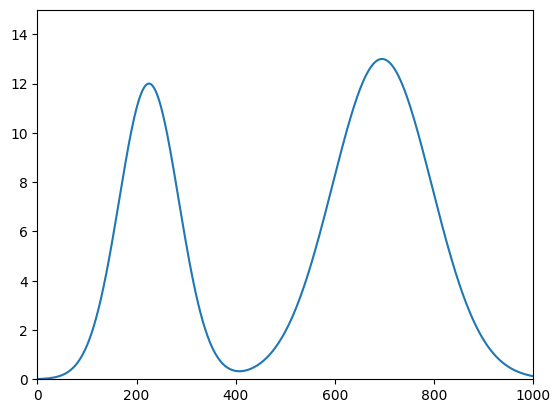

In [ ]:
plt.plot(x, y_type1)
plt.xlim(0, seq_len)
plt.ylim(-0, 15)
plt.show()

In [ ]:
data_B[0, :] = y_type1
# for the rest "num_curves-1"
# we add small noises on range and height to simulate small difference between individuals
for i in range(1, num_curves):
    peak_location_b1i = peak_location_b1 # fixed
    peak_range_b1i = peak_range_b1 + random.randint(-3, 3)
    peak_height_b1i = peak_height_b1 + random.uniform(-1, 1)

    peak_location_b2i = peak_location_b2 # fixed
    peak_range_b2i = peak_range_b2 + random.randint(-3, 3)
    peak_height_b2i = peak_height_b2 + random.uniform(-1.5, 1.5)

    y_b1i = peak_height_b1i * np.exp(-0.5 * ((x - peak_location_b1i) ** 2) / peak_range_b1i ** 2)
    y_b2i = peak_height_b2i * np.exp(-0.5 * ((x - peak_location_b2i) ** 2) / peak_range_b2i ** 2)

    y_i = y_b1i + y_b2i

    data_B[i, :] = y_i


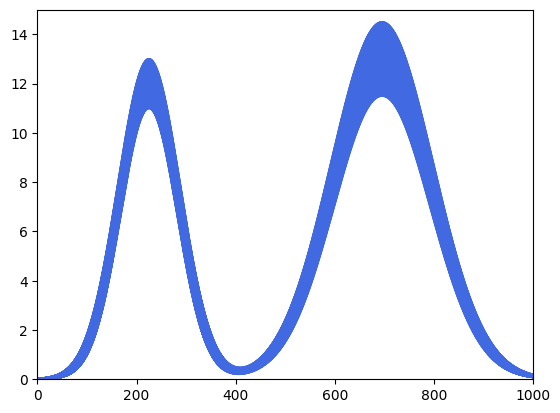

In [ ]:
for i in range(num_curves):
    plt.plot(x, data_B[i, :], 'royalblue', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(0, 15)
plt.show()

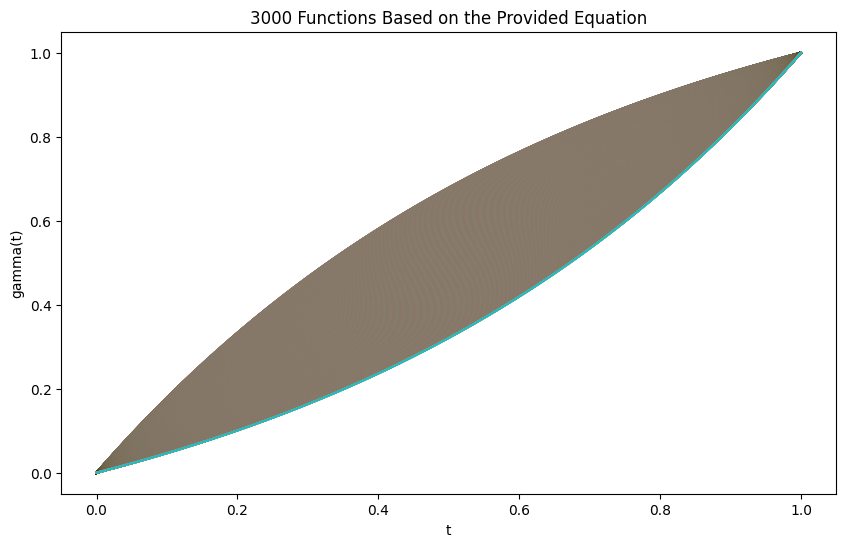

In [ ]:
# no sub-class
# generate gammas
n_length = seq_len
a_values = np.linspace(-1.5, 1.5, num_curves)

# Generate the x-axis (t)
t = np.linspace(0, 1, n_length)

# Generate the 10 functions
functions_each_type_B = []
for a_i in a_values:
    y_i = (np.exp(a_i * t) - 1) / (np.exp(a_i) - 1) if a_i != 0 else t
    functions_each_type_B.append(y_i)

# Plot the functions
fig, ax = plt.subplots(figsize=(10, 6))
for i, y_i in enumerate(functions_each_type_B):
    ax.plot(t, y_i, label=f"a={a_values[i]:.2f}")
ax.set_xlabel("t")
ax.set_ylabel("gamma(t)")
ax.set_title(f"{num_curves} Functions Based on the Provided Equation")
plt.show()

In [ ]:
gammas_B = np.array(functions_each_type_B)

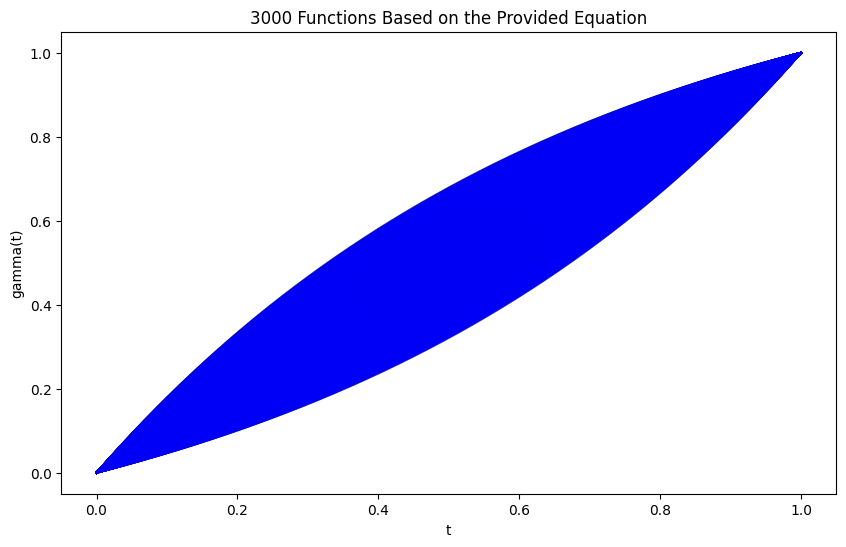

In [ ]:
# Plot the functions
fig, ax = plt.subplots(figsize=(10, 6))
for i, y_i in enumerate(functions_each_type_A):
    ax.plot(t, y_i, label=f"a={a_values[i]:.2f}", color = "yellow", alpha = 0.1)
for i, y_i in enumerate(functions_each_type_B):
    ax.plot(t, y_i, label=f"a={a_values[i]:.2f}", color = "blue", alpha = 0.1)
ax.set_xlabel("t")
ax.set_ylabel("gamma(t)")
ax.set_title(f"{num_curves} Functions Based on the Provided Equation")
plt.show()

In [ ]:
 #################  Apply f@r  #######################
length_adjust = seq_len - 1
xid_train = torch.arange(seq_len).repeat(num_curves, 1)
# f @ r
input_f = torch.as_tensor(data_B) # (num_curves, seq_length)
r = torch.as_tensor(gammas_B)
f_r_B = Interp1d()(xid_train, input_f.squeeze(1), r * (length_adjust))
f_r_B = f_r_B.numpy()
f_r_B.shape

<ipython-input-33-4026b5931410>:7: DeprecationWarning: <class 'torchinterp1d.interp1d.Interp1d'> should not be instantiated. Methods on autograd functions are all static, so you should invoke them on the class itself. Instantiating an autograd function will raise an error in a future version of PyTorch.
  f_r_B = Interp1d()(xid_train, input_f.squeeze(1), r * (length_adjust))


(3000, 1000)

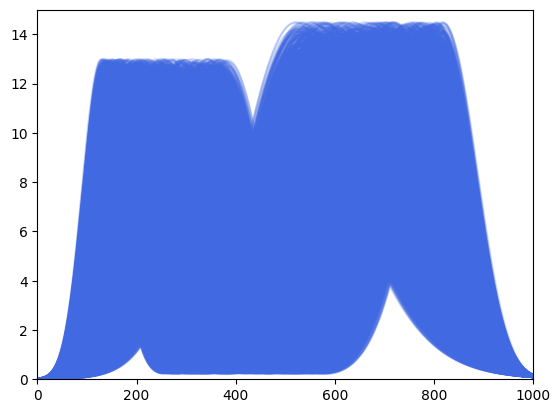

In [ ]:
for i in range(num_curves):
    plt.plot(x, f_r_B[i, :], 'royalblue', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(0, 15)
plt.show()

In [ ]:
# add some noise
noise_scale = 0.05
for i in range(num_curves):
    # Add some smooth noise to the curve
    # This is done by generating random noise, smoothing it with a moving average, and adding it to the y values
    ##############################################################################
    np.random.seed(3407)
    noise = np.random.normal(0, noise_scale, size=x.shape)
    # smooth_noise = np.convolve(noise, np.ones(5)/5, mode='same')
    smooth_noise = np.convolve(noise, np.ones(50)/50, mode='same')
    f_r_A[i, :] += smooth_noise
    f_r_B[i, :] += smooth_noise
    ##############################################################################

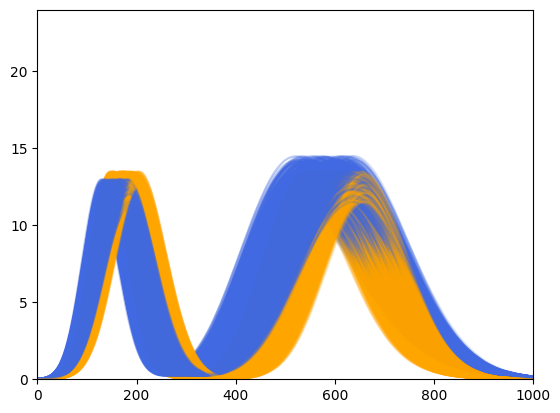

In [ ]:
for i in range(num_curves):
    if i < 1000:
        plt.plot(x, f_r_A[i, :], 'orange', alpha=0.2)
        plt.plot(x, f_r_B[i, :], 'royalblue', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(-0, 24)
plt.show()

In [ ]:
f_r_A.shape, f_r_B.shape

((3000, 1000), (3000, 1000))

In [ ]:
data_A.shape, data_B.shape

((3000, 1000), (3000, 1000))

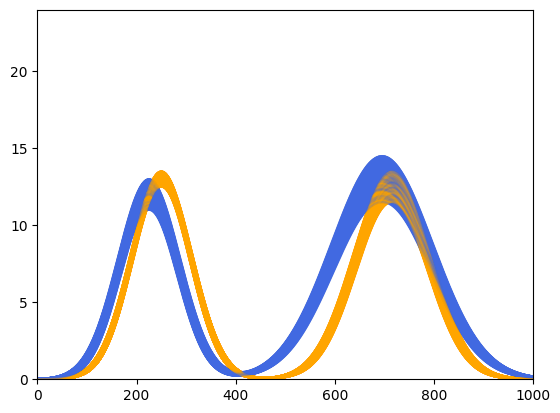

In [ ]:
for i in range(num_curves):
    if i < 1000:
        plt.plot(x, data_A[i, :], 'orange', alpha=0.2)
        plt.plot(x, data_B[i, :], 'royalblue', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(-0, 24)
plt.show()

In [ ]:
true_signal_data_A_df = pd.DataFrame(data_A)
true_signal_data_B_df = pd.DataFrame(data_B)
true_signal_data_A_df.to_csv('allTrueSignals_0.csv', index=False, header=False)
true_signal_data_B_df.to_csv('allTrueSignals_1.csv', index=False, header=False)

In [ ]:
true_signal_data_A_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.002208,0.002367,0.002536,0.002717,0.002909,0.003115,0.003334,0.003568,0.003817,0.004082,...,0.014335,0.013647,0.012989,0.012361,0.011762,0.011189,0.010642,0.010120,0.009623,0.009148
1,0.001188,0.001279,0.001378,0.001483,0.001596,0.001717,0.001846,0.001985,0.002133,0.002292,...,0.009143,0.008680,0.008239,0.007819,0.007419,0.007038,0.006676,0.006331,0.006003,0.005690
2,0.002854,0.003052,0.003263,0.003488,0.003727,0.003982,0.004252,0.004540,0.004846,0.005172,...,0.008446,0.008007,0.007589,0.007192,0.006814,0.006455,0.006113,0.005789,0.005480,0.005187
3,0.002182,0.002338,0.002506,0.002684,0.002875,0.003078,0.003294,0.003525,0.003771,0.004033,...,0.022114,0.021131,0.020188,0.019284,0.018417,0.017586,0.016791,0.016028,0.015298,0.014598
4,0.002825,0.003021,0.003230,0.003452,0.003689,0.003940,0.004208,0.004493,0.004796,0.005118,...,0.024067,0.022997,0.021970,0.020986,0.020043,0.019139,0.018273,0.017443,0.016648,0.015887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.003695,0.003943,0.004206,0.004486,0.004784,0.005099,0.005435,0.005790,0.006168,0.006568,...,0.017231,0.016425,0.015654,0.014916,0.014211,0.013537,0.012892,0.012276,0.011688,0.011125
2996,0.003868,0.004127,0.004403,0.004696,0.005008,0.005338,0.005689,0.006061,0.006457,0.006876,...,0.009205,0.008739,0.008295,0.007872,0.007470,0.007086,0.006721,0.006374,0.006043,0.005729
2997,0.003716,0.003965,0.004230,0.004512,0.004811,0.005129,0.005466,0.005824,0.006203,0.006606,...,0.010450,0.009921,0.009417,0.008937,0.008480,0.008045,0.007631,0.007236,0.006861,0.006504
2998,0.001229,0.001324,0.001426,0.001535,0.001652,0.001777,0.001911,0.002054,0.002208,0.002373,...,0.016788,0.016003,0.015251,0.014533,0.013846,0.013189,0.012561,0.011961,0.011387,0.010839


In [ ]:
# also, save the original true signals
data_A_df = pd.DataFrame(data_A)
data_B_df = pd.DataFrame(data_B)
true_signals = pd.concat([data_A_df, data_B_df], ignore_index=True)
true_signals.to_csv('allTrueSignals.csv', index=False, header=False)

In [ ]:
# (save data and gammas)
# now form the data into a dataframe, with label=0 for class A and label=1 for class B
# the label is added to the last column
data_A_df = pd.DataFrame(f_r_A)
data_A_df['label'] = 0
data_B_df = pd.DataFrame(f_r_B)
data_B_df['label'] = 1
# combine
data_syn = pd.concat([data_A_df, data_B_df], ignore_index=True)
data_syn.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,label
0,0.001092,0.001855,0.003398,0.003021,0.001142,0.001162,0.001791,0.001056,0.001989,0.003067,...,0.012576,0.012221,0.010489,0.008609,0.008218,0.007042,0.005879,0.004581,0.005354,0
1,0.000072,0.000701,0.002095,0.001552,-0.000511,-0.000697,-0.000297,-0.001285,-0.000633,0.000135,...,0.008524,0.008250,0.006595,0.004791,0.004475,0.003372,0.002282,0.001053,0.001896,0
2,0.001738,0.002579,0.004208,0.003926,0.002153,0.002289,0.003045,0.002450,0.003536,0.004783,...,0.007952,0.007687,0.006041,0.004246,0.003938,0.002844,0.001762,0.000542,0.001394,0
3,0.001066,0.001824,0.003363,0.002980,0.001095,0.001108,0.001729,0.000985,0.001908,0.002974,...,0.018846,0.018382,0.016544,0.014558,0.014064,0.012788,0.011525,0.010129,0.010804,0
4,0.001709,0.002545,0.004169,0.003881,0.002102,0.002230,0.002978,0.002374,0.003450,0.004684,...,0.020363,0.019869,0.018001,0.015986,0.015463,0.014158,0.012867,0.011444,0.012093,0


In [ ]:
data_syn.to_csv('data_more_drastic.csv', index=False, header=False)